In [1]:

"""
Connect senior:Mainland
"""
import pandas as pd
import json
import requests
def ssql(sql):
    admin_token = '2cebeb5c7edac5ef0d7c5a640e69fc7d43bf2cd6a24ce43dfee3dd33662c0bab'
    url = 'http://sensor.wb-intra.com/api/sql/query?token=%s&project=production' % admin_token
    data = {'q': sql, 'format': 'json'}
    req = requests.post(url,data)
    req_dec = req.content.decode()
    try:
        req_json = json.loads('[' + req_dec.replace('\n', ',')[:-1] + ']')
        df_d_id = pd.DataFrame(req_json)
        return df_d_id
    except:
        print(req_dec)

In [8]:
df = ssql("""
SELECT t0.game_level
FROM
  (SELECT distinct_id,
          game_level,
          time,
          row_number()over(partition BY distinct_id
                           ORDER BY time DESC) AS time_rank
   FROM events
   WHERE event = 'gameOver'
     AND gameTypeId = 1800
     AND date BETWEEN '2020-11-30' AND current_date()
   GROUP BY 1,
            2,
            3)t0
WHERE t0.time_rank = 1
""")

In [9]:
df

,game_level
0,5
1,8
2,10
3,1
4,1
...,...
418781,0
418782,2
418783,6
418784,11


In [5]:
import matplotlib.pyplot as plt

In [26]:
bin = len(df['game_level'].unique())

In [27]:
bin

32

(array([4.79493491e-02, 5.92656223e-02, 1.34096974e-01, 1.00673175e-01,
        1.00365064e-01, 9.61106781e-02, 8.61500901e-02, 7.71705250e-02,
        6.91029663e-02, 5.65887605e-02, 4.52626278e-02, 3.90634496e-02,
        2.95169617e-02, 2.29579108e-02, 1.74045317e-02, 1.31747942e-02,
        1.00813673e-02, 7.62634484e-03, 5.51394099e-03, 4.09170409e-03,
        2.95785837e-03, 2.25783189e-03, 1.56520006e-03, 1.03525043e-03,
        8.15875935e-04, 5.64457973e-04, 3.77126943e-04, 2.26769142e-04,
        1.55287565e-04, 6.16220495e-05, 6.40869315e-05, 9.85952792e-06]),
 array([ 0.     ,  0.96875,  1.9375 ,  2.90625,  3.875  ,  4.84375,
         5.8125 ,  6.78125,  7.75   ,  8.71875,  9.6875 , 10.65625,
        11.625  , 12.59375, 13.5625 , 14.53125, 15.5    , 16.46875,
        17.4375 , 18.40625, 19.375  , 20.34375, 21.3125 , 22.28125,
        23.25   , 24.21875, 25.1875 , 26.15625, 27.125  , 28.09375,
        29.0625 , 30.03125, 31.     ]),
 <BarContainer object of 32 artists>)

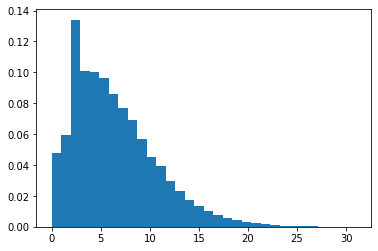

In [28]:
plt.hist(df.game_level,bins=int(bin),density=True)

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='game_level'>

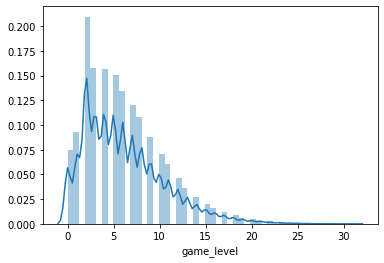

In [31]:
sns.distplot(df.game_level,kde=True)